In [1]:
import pandas as pd

In [2]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [3]:
loyautes = pd.read_csv('out/loyautes.csv', index_col='acteurRef')

In [4]:
acteurs = (
    pd
    .read_csv('out/votes.csv')
    .join(loyautes[['loyaute']], on='acteurRef')
    .assign(
        loyaute = lambda df: 1 - df.loyaute.fillna(0)
    )
)

acteurs

,acteurRef,mandatRef,parDelegation,position,organe,date,scrutin,groupe_majorite,loyaute
0,PA609520,PM797676,False,contre,PO800538,2022-12-08,VTANR5L16V703,contre,0.881579
1,PA722252,PM797610,False,contre,PO800538,2022-12-08,VTANR5L16V703,contre,0.979167
2,PA605963,PM796494,False,contre,PO800538,2022-12-08,VTANR5L16V703,contre,0.974484
3,PA721852,PM797565,True,contre,PO800538,2022-12-08,VTANR5L16V703,contre,0.995988
4,PA718930,PM796287,False,contre,PO800538,2022-12-08,VTANR5L16V703,contre,0.996705
...,...,...,...,...,...,...,...,...,...
302410,PA795184,PM797346,False,abstention,PO800502,2022-10-28,VTANR5L16V452,abstention,0.974638
302411,PA795998,PM797796,False,abstention,PO800502,2022-10-28,VTANR5L16V452,abstention,0.945513
302412,PA796010,PM797802,False,abstention,PO800502,2022-10-28,VTANR5L16V452,abstention,0.973064
302413,PA774962,PM797766,False,abstention,PO800502,2022-10-28,VTANR5L16V452,abstention,0.949891


In [5]:
X = (
    acteurs
    .assign(
        position = lambda df: df.position.replace({'contre': -1, 'pour': 1, 'abstention': 0 })
    )
    .pivot_table(
        index='acteurRef',
        columns='scrutin',
        values='position'
    )
    .fillna(0)
)

X

scrutin,VTANR5L16V1,VTANR5L16V10,VTANR5L16V100,VTANR5L16V1000,VTANR5L16V1001,VTANR5L16V1002,VTANR5L16V1003,VTANR5L16V1004,VTANR5L16V1005,VTANR5L16V1006,...,VTANR5L16V990,VTANR5L16V991,VTANR5L16V992,VTANR5L16V993,VTANR5L16V994,VTANR5L16V995,VTANR5L16V996,VTANR5L16V997,VTANR5L16V998,VTANR5L16V999
acteurRef,,,,,,,,,,,,,,,,,,,,,
PA1008,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PA1206,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA1327,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA1567,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA805166,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
PA817203,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
PA817211,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
pca = PCA(n_components=2)
X_r = pca.fit(X.values).transform(X.values)

In [7]:
pca.explained_variance_ratio_

array([0.36881694, 0.10420142])

In [8]:
len(X_r)

580

<Axes: xlabel='x', ylabel='y'>

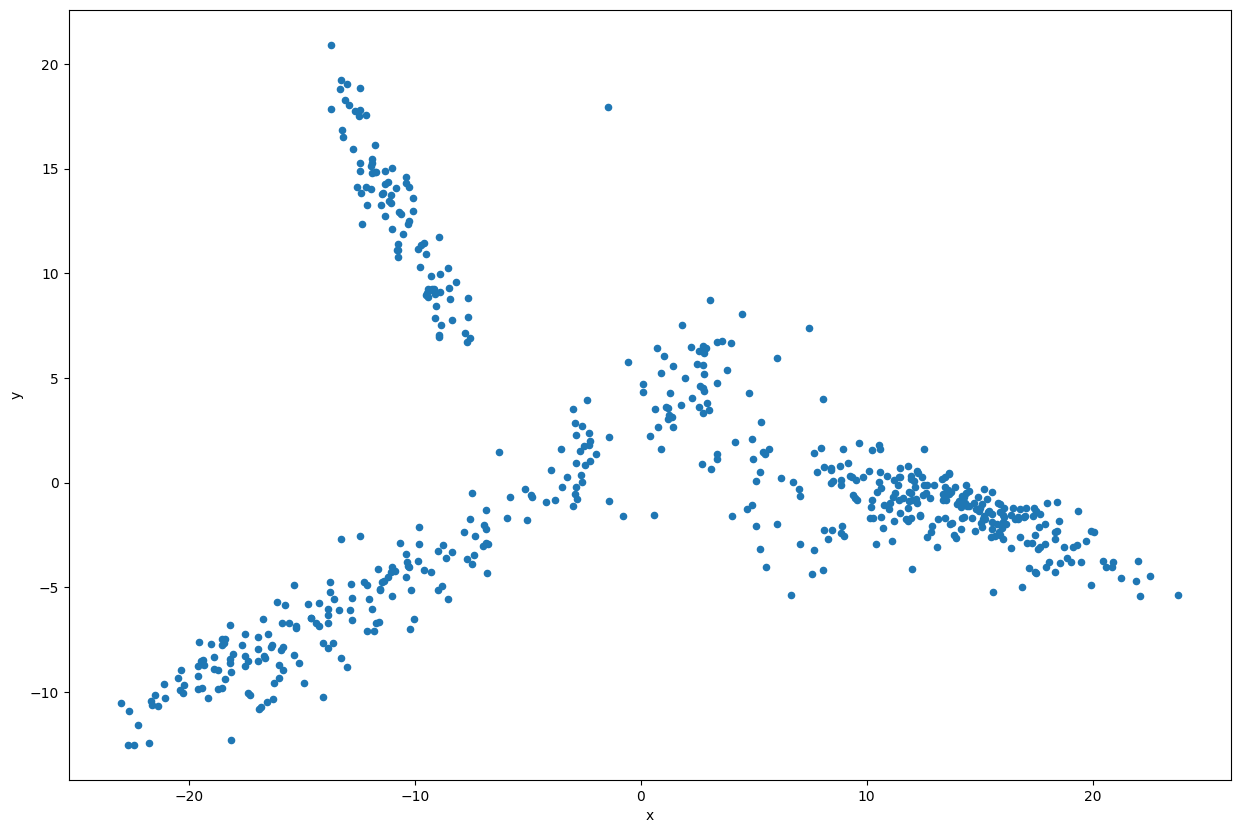

In [9]:
(
    pd
    .DataFrame(X_r, columns=["x", "y"])
    .plot
    .scatter(
        x="x",
        y="y",
        figsize=(15,10)
    )
)

In [10]:
organes = pd.read_csv('out/organes.csv')

In [11]:
(
        X.reset_index()
        .join(acteurs.drop_duplicates(subset='acteurRef').set_index('acteurRef'), on='acteurRef')
        .join(organes.set_index('uid'), on='organe')
)

,acteurRef,VTANR5L16V1,VTANR5L16V10,VTANR5L16V100,VTANR5L16V1000,VTANR5L16V1001,VTANR5L16V1002,VTANR5L16V1003,VTANR5L16V1004,VTANR5L16V1005,...,regime,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee
0,PA1008,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,6.0,#DF84B5
1,PA1206,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,NaN,99.0,#8D949A
2,PA1327,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,4.0,#4565AD
3,PA1567,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,6.0,#DF84B5
4,PA1592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,NaN,99.0,#8D949A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,PA805166,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,5.0,#CE5215
576,PA817203,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Majoritaire,1.0,#61468F
577,PA817211,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,3.0,#E42313
578,PA822617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,NaN,99.0,#8D949A


<Axes: xlabel='x', ylabel='y'>

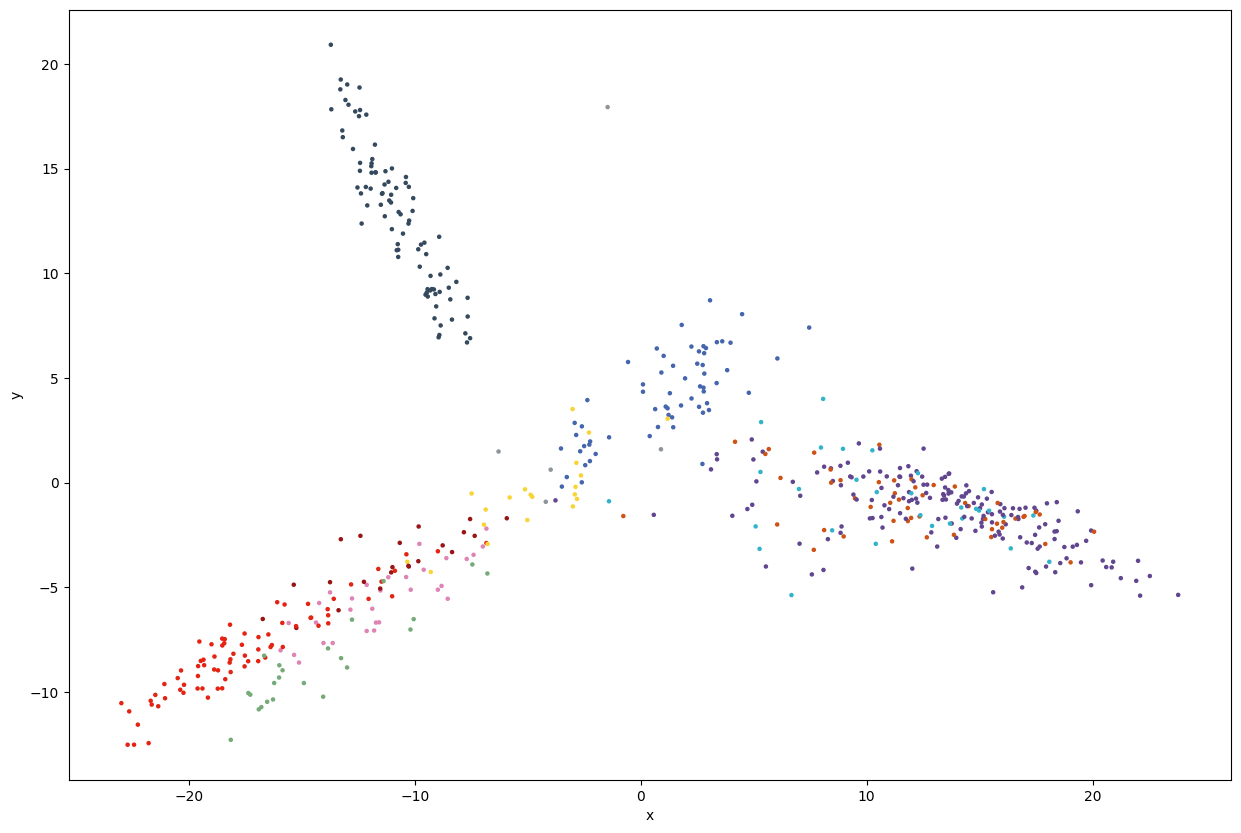

In [12]:
(
    pd
    .DataFrame(X_r, columns=["x", "y"])
    .join(
        X.reset_index()
        .join(acteurs.drop_duplicates(subset='acteurRef').set_index('acteurRef'), on='acteurRef')
        .join(organes.set_index('uid'), on='organe')
    )
    .plot
    .scatter(
        x="x",
        y="y",
        s=5,
        c="couleurAssociee",
        figsize=(15,10)
    )
)

In [13]:
(
    pd
    .DataFrame(X_r, columns=["x", "y"])
    .join(
        X.reset_index()
        #[['acteurRef']]
        .join(acteurs.set_index('acteurRef'), on='acteurRef')
        #[['organe']]
        .join(organes.set_index('uid'), on='organe')
        #[['couleurAssociee']]
    )
    .query("y > 10")
    [['libelle']]
)

,libelle
78,Rassemblement National
78,Rassemblement National
78,Rassemblement National
78,Rassemblement National
78,Rassemblement National
...,...
573,Rassemblement National
573,Rassemblement National
573,Rassemblement National
573,Rassemblement National


In [14]:
axe = (
    pd
    .DataFrame(X_r, columns=["x", "y"])
    .join(
        X.reset_index()
        .join(acteurs.drop_duplicates(subset='acteurRef').set_index('acteurRef'), on='acteurRef')
        .join(organes.set_index('uid'), on='organe')
    )
    [['x','y', 'organe']]
    .groupby('organe')
    .median()
    .sort_values('y')
)

(
    axe
    .join(organes.set_index('uid'))
    .set_index('libelle')
)

,x,y,@xmlns,@xmlns:xsi,@xsi:type,codeType,libelleEdition,libelleAbrege,libelleAbrev,viMoDe,...,regime,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee
libelle,,,,,,,,,,,,,,,,,,,,,
Écologiste - NUPES,-15.861192,-8.962629,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Écologiste - NUPES,Ecolo - NUPES,ECOLO,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,8.0,#77AA79
La France insoumise - Nouvelle Union Populaire écologique et sociale,-18.195686,-8.284161,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe La France insoumise - Nouvelle Union...,LFI - NUPES,LFI-NUPES,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,3.0,#E42313
Socialistes et apparentés (membre de l’intergroupe NUPES),-11.725753,-5.530954,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Socialistes et apparentés (membre de...,SOC,SOC,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,6.0,#DF84B5
Gauche démocrate et républicaine - NUPES,-10.833742,-3.864243,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe de la Gauche démocrate et républicai...,GDR - NUPES,GDR-NUPES,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,9.0,#991414
Démocrate (MoDem et Indépendants),11.967708,-1.401537,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Démocrate (MoDem et Indépendants),Dem,DEM,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,5.0,#CE5215
Horizons et apparentés,11.211491,-1.290768,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Horizons et apparentés,HOR,HOR,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,7.0,#32B3CA
Renaissance,13.744716,-1.252989,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,du groupe Renaissance,RE,RE,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Majoritaire,1.0,#61468F
"Libertés, Indépendants, Outre-mer et Territoires",-4.841635,-0.627983,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,"du groupe Libertés, Indépendants, Outre-mer et...",LIOT,LIOT,"{'dateDebut': '2022-06-28', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,10.0,#F8D434
Non inscrit,-3.991444,1.488039,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,des députés non inscrits,NI,NI,"{'dateDebut': '2022-06-22', 'dateAgrement': No...",...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,NaN,99.0,#8D949A


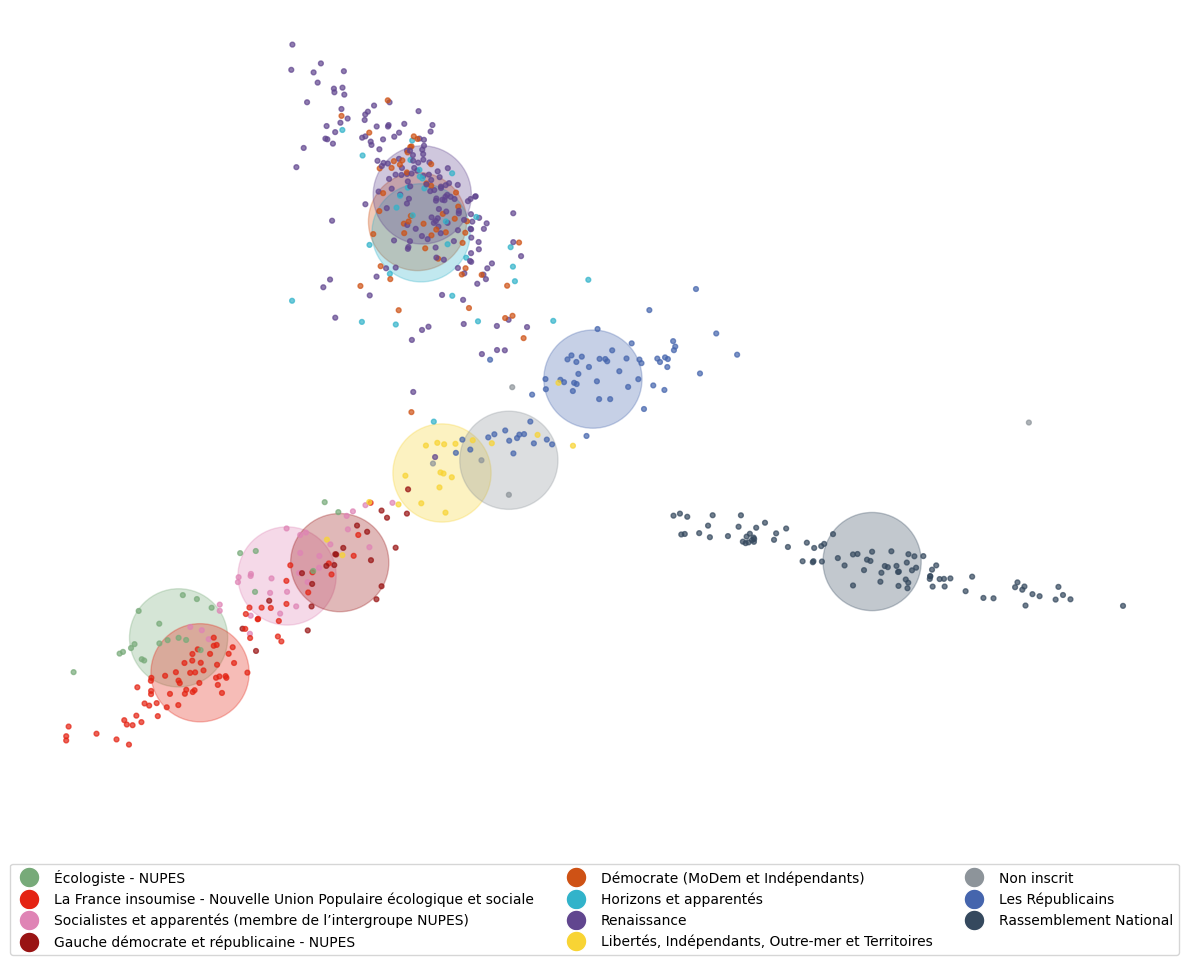

In [15]:
fig, ax = plt.subplots()

(
    axe
    .join(organes.set_index('uid'))
    .plot
    .scatter(
        x="y",
        y="x",
        c="couleurAssociee",
        alpha=0.3,
        s=5000,
        ax=ax,
    )
)

(
    pd
    .DataFrame(X_r, columns=["x", "y"])
    .join(
        X.reset_index()
        .join(acteurs.drop_duplicates(subset='acteurRef').set_index('acteurRef'), on='acteurRef')
        .join(organes.set_index('uid'), on='organe')
    )
    .plot
    .scatter(
        x="y",
        y="x",
        s=12,
        #a="loyaute",
        alpha= 0.7, #1-loyautes.loyaute.fillna(0),
        c="couleurAssociee",
        figsize=(15,10),
        ax=ax
    )
)

plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', label=org['libelle'], markerfacecolor=org['couleurAssociee'], markersize=15)
        for org in axe.join(organes.set_index('uid')).to_records()
    ],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3
)

ax.axis('off')

plt.show()

In [16]:
axe.join(organes.set_index('uid'))

,x,y,@xmlns,@xmlns:xsi,@xsi:type,codeType,libelle,libelleEdition,libelleAbrege,libelleAbrev,...,regime,legislature,secretariat,listePays,regimeJuridique,siteInternet,nombreReunionsAnnuelles,positionPolitique,preseance,couleurAssociee
organe,,,,,,,,,,,,,,,,,,,,,
PO800526,-15.861192,-8.962629,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Écologiste - NUPES,du groupe Écologiste - NUPES,Ecolo - NUPES,ECOLO,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,8.0,#77AA79
PO800490,-18.195686,-8.284161,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,La France insoumise - Nouvelle Union Populaire...,du groupe La France insoumise - Nouvelle Union...,LFI - NUPES,LFI-NUPES,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,3.0,#E42313
PO800496,-11.725753,-5.530954,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Socialistes et apparentés (membre de l’intergr...,du groupe Socialistes et apparentés (membre de...,SOC,SOC,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,6.0,#DF84B5
PO800502,-10.833742,-3.864243,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Gauche démocrate et républicaine - NUPES,du groupe de la Gauche démocrate et républicai...,GDR - NUPES,GDR-NUPES,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,9.0,#991414
PO800484,11.967708,-1.401537,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Démocrate (MoDem et Indépendants),du groupe Démocrate (MoDem et Indépendants),Dem,DEM,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,5.0,#CE5215
PO800514,11.211491,-1.290768,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Horizons et apparentés,du groupe Horizons et apparentés,HOR,HOR,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Minoritaire,7.0,#32B3CA
PO800538,13.744716,-1.252989,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Renaissance,du groupe Renaissance,RE,RE,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Majoritaire,1.0,#61468F
PO800532,-4.841635,-0.627983,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,"Libertés, Indépendants, Outre-mer et Territoires","du groupe Libertés, Indépendants, Outre-mer et...",LIOT,LIOT,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,Opposition,10.0,#F8D434
PO793087,-3.991444,1.488039,http://schemas.assemblee-nationale.fr/referentiel,http://www.w3.org/2001/XMLSchema-instance,GroupePolitique_type,GP,Non inscrit,des députés non inscrits,NI,NI,...,5ème République,16.0,"{'secretaire01': None, 'secretaire02': None}",NaN,NaN,NaN,NaN,NaN,99.0,#8D949A


In [17]:
groupe_categorie = pd.CategoricalDtype(categories=axe.join(organes.set_index('uid')).libelle, ordered=True)

groupe_categorie

CategoricalDtype(categories=['Écologiste - NUPES',
                  'La France insoumise - Nouvelle Union Populaire écologique et sociale',
                  'Socialistes et apparentés (membre de l’intergroupe NUPES)',
                  'Gauche démocrate et républicaine - NUPES',
                  'Démocrate (MoDem et Indépendants)',
                  'Horizons et apparentés', 'Renaissance',
                  'Libertés, Indépendants, Outre-mer et Territoires',
                  'Non inscrit', 'Les Républicains', 'Rassemblement National'],
, ordered=True)

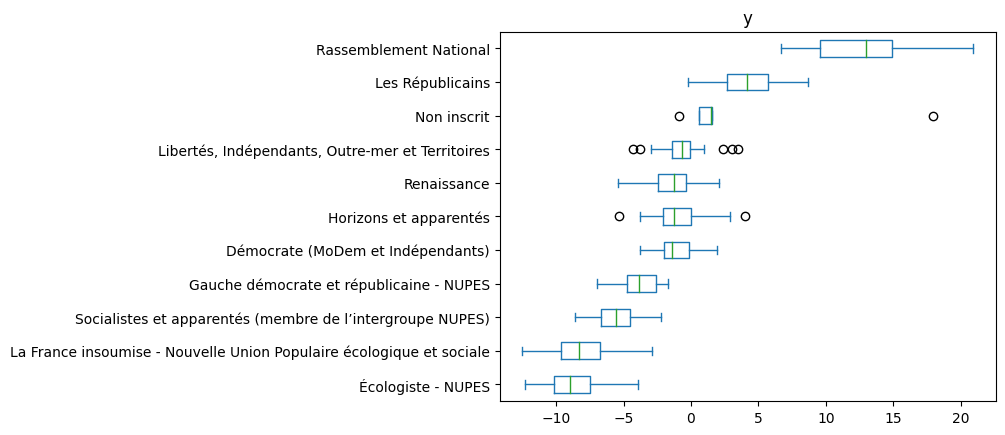

In [18]:
fig, ax = plt.subplots()

(
    pd
    .DataFrame(X_r, columns=["x", "y"])
    .join(
        X.reset_index()
        .join(acteurs.drop_duplicates(subset='acteurRef').set_index('acteurRef'), on='acteurRef')
        .join(organes.set_index('uid'), on='organe')
    )
    [['y', 'libelle', 'couleurAssociee']]
    .assign(
        libelle = lambda df: df.libelle.astype(groupe_categorie)
    )
    .reset_index(drop=True)
    .plot
    .box(
        by="libelle",
        vert=False,
        ax=ax,
        #xlim=[-20, 20]
    )
)

ax.set_yticklabels(axe.join(organes.set_index('uid')).libelle)

plt.show()

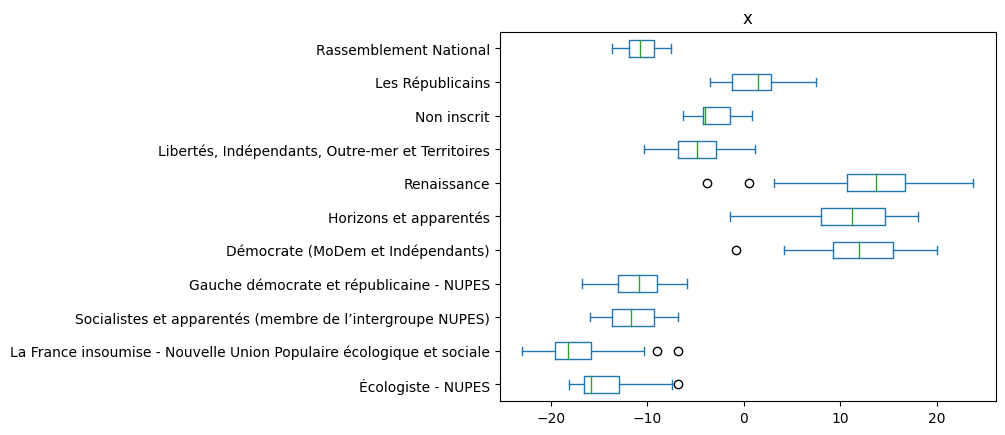

In [19]:
fig, ax = plt.subplots()

(
    pd
    .DataFrame(X_r, columns=["x", "y"])
    .join(
        X.reset_index()
        .join(acteurs.drop_duplicates(subset='acteurRef').set_index('acteurRef'), on='acteurRef')
        .join(organes.set_index('uid'), on='organe')
    )
    [['x', 'libelle', 'couleurAssociee']]
    .assign(
        libelle = lambda df: df.libelle.astype(groupe_categorie)
    )
    .reset_index(drop=True)
    .plot
    .box(
        by="libelle",
        vert=False,
        ax=ax
    )
)

ax.set_yticklabels(axe.join(organes.set_index('uid')).libelle)

plt.show()